In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [2]:
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [3]:
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

naip_data.shape

(4, 2312, 4377)

In [4]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

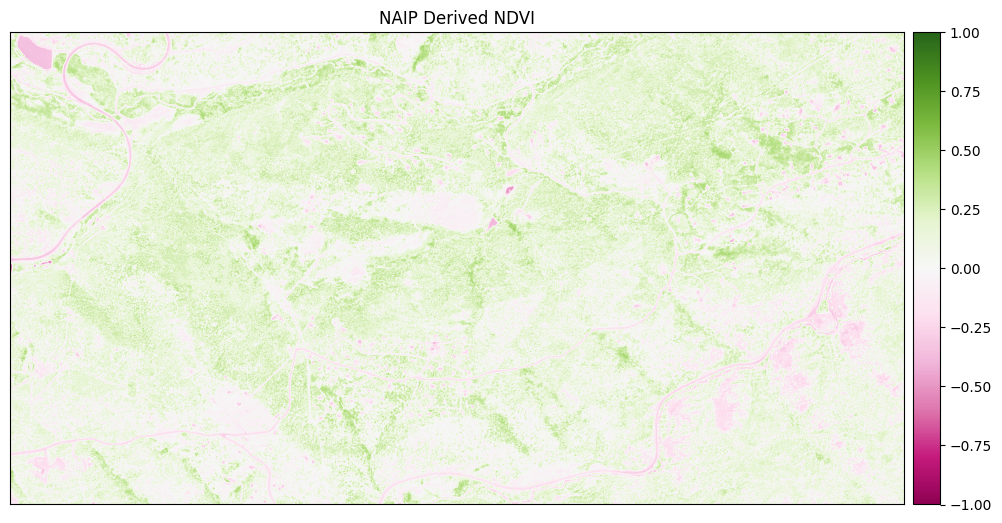

In [5]:
ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI")
plt.show()

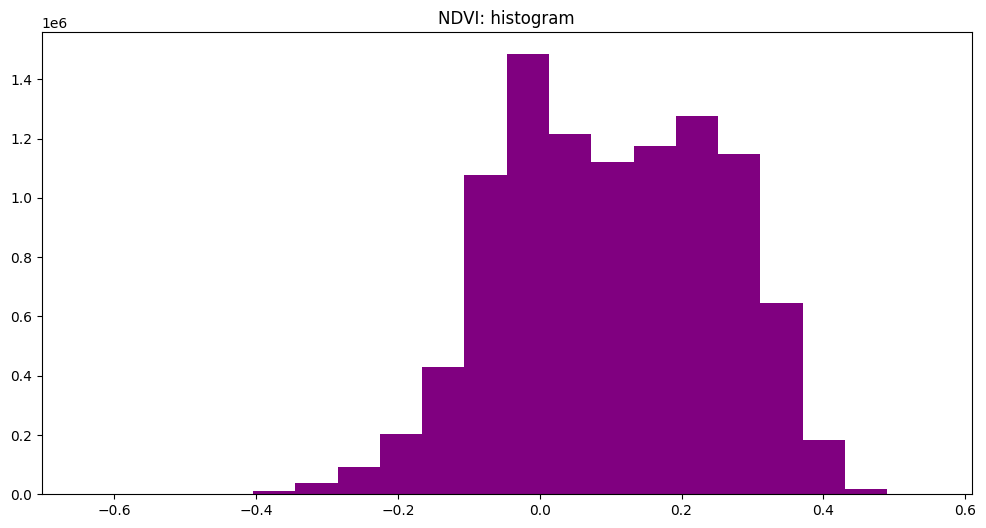

In [6]:
ep.hist(naip_ndvi.values,
        figsize=(12, 6),
        title=["NDVI: histogram"])
plt.show()

In [7]:
naip_ndvi_outpath = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

naip_ndvi.rio.to_raster(naip_ndvi_outpath)

In [8]:
ls cold-springs-fire/outputs

naip_ndvi.tif
